# Image Processing in Python Training

## Package Used
scikit-image

matplotlib

In [25]:
from skimage import data
from matplotlib import pyplot as plt
rocket_image = data.rocket()

#to get information of the image (whether if it is grayscale or rgb. if rgb it it will have 3rd output like so)
rocket_image.shape

(427, 640, 3)

In [7]:
coins_image = data.coins()
#to get information of the image (whether if it is grayscale or rgb. if rgb it it will have 3rd output like so)
#here, it is grayscale
coins_image.shape

(303, 384)

### Turning Color image into grayscale

In [5]:
from skimage import color
grayscale = color.rgb2gray({your_image})
rgb = color.gray2rgb(grayscale)

NameError: name 'original' is not defined

### Visualizing images (using matplotlib)

In [13]:
def show_image(image, title = 'Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

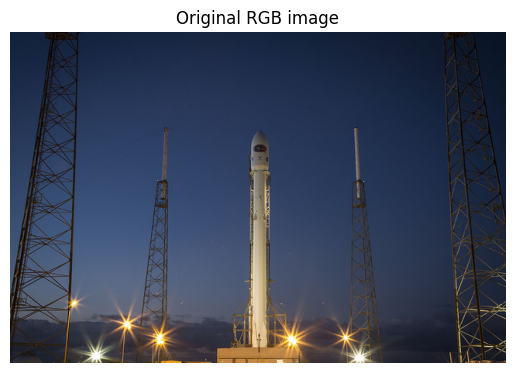

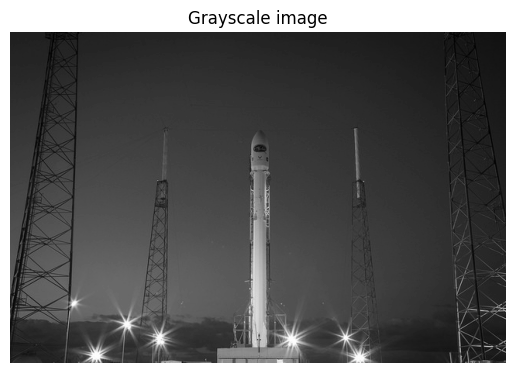

In [14]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# Numpy for images

Flipping images, extract and analyze features

### Colors with NumPy

In [ ]:
#showing the color intensity for the image
#Obtaining the red values of the image
#  image[h,w,color layer]
red = image[:,:,0]

#Obtaining the green values of the image
green = image[:,:,1]

#Obtaining the blue values of the image
blue = image[:,:,2]

In [15]:
#Size of image (how many pixels)
coins_image.size

116352

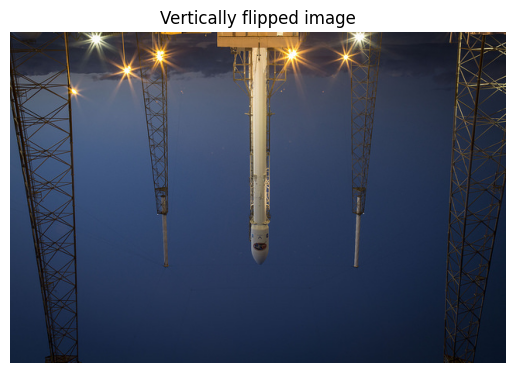

In [20]:
import numpy as np
#Flipping images: vertically
vertically_flipped = np.flipud(rocket)

show_image(vertically_flipped,'Vertically flipped image')

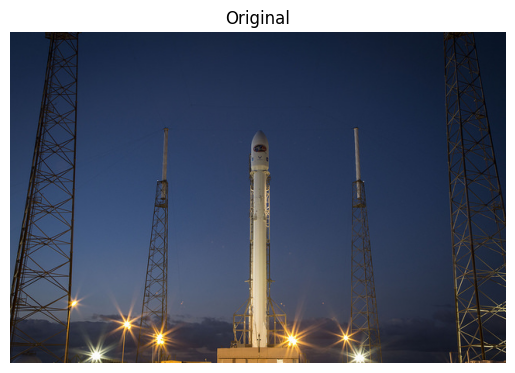

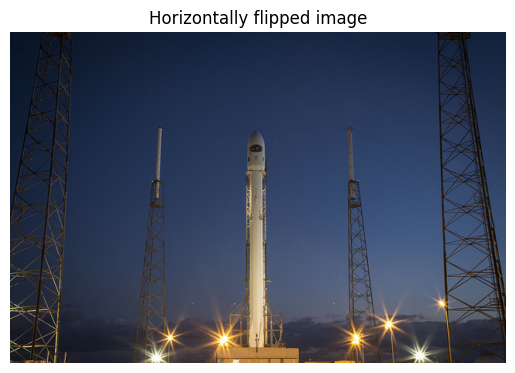

In [22]:
#Flipping images: horizontally (mirrored image)
horizontally_flipped = np.fliplr(rocket)

show_image(rocket,'Original')
show_image(horizontally_flipped,'Horizontally flipped image')

## Histogram of an Image
Gray Levels: 0 - pure black to 255 - pure white

Can also show histograms of red, green and blue

(array([ 128.,   59.,   65.,   82.,   92.,  114.,  137.,  185.,  291.,
         595.,  767., 1061., 1037., 1261., 1403., 1475., 1996., 2071.,
        2508., 3241., 3919., 4197., 4689., 4983., 4459., 4593., 4605.,
        4433., 4882., 5308., 5132., 5521., 5100., 4735., 5035., 5106.,
        5223., 5461., 5324., 5365., 5255., 5195., 5506., 5282., 4996.,
        4607., 4769., 4657., 4415., 4229., 3689., 3679., 3540., 3346.,
        3205., 3133., 3041., 2827., 2696., 2526., 2579., 2522., 2380.,
        2188., 2148., 2075., 1916., 1887., 1789., 1902., 1892., 1898.,
        1880., 1855., 1738., 1581., 1616., 1625., 1496., 1447., 1412.,
        1362., 1415., 1383., 1252., 1330., 1418., 1143., 1112., 1269.,
        1146., 1150.,  951.,  845.,  736.,  672.,  613.,  588.,  576.,
         558.,  442.,  369.,  347.,  329.,  296.,  220.,  229.,  223.,
         196.,  198.,  191.,  175.,  187.,  164.,  168.,  155.,  157.,
         145.,  131.,  144.,  118.,  118.,  119.,   97.,  118.,  117.,
      

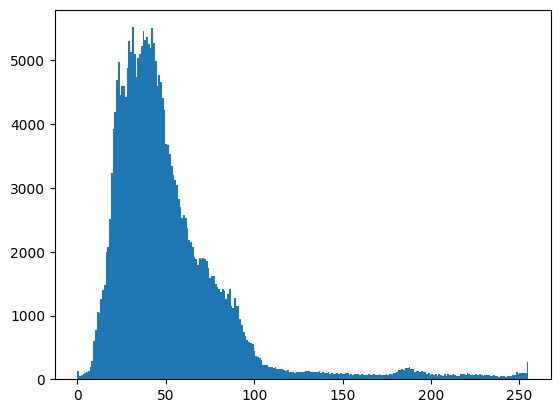

In [26]:
#Red color of the image
red_image = rocket[:,:,0]

#obtain the red histogram
plt.hist(red_image.ravel(), bins = 256)


### Getting Max and min pixel intensity of the image (max and min value of the histogram)

In [44]:
print(np.min(rocket))
print(np.max(rocket))

0
255


# Thresholding

to categorize image

In [ ]:
#Categories of Thresholding
# Global or Histogram Based: Good for uniform backgrounds
# Local or adaptive: for uneven background illumination

In [27]:
from skimage.filters import try_all_threshold

#obtain all resulting images
fig, ax = try_all_threshold(image, verbose=False)

#Showing resulting plots
show_plot(fig, ax)



## Calculating Optimal Thresh Value

For Global

In [28]:
# import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(image)

# Apply thresholding to the image
binary_global = image > thresh

NameError: name 'threshold' is not defined

## Calculating Optimal Thresh Value

For Local (for uneven background, meaning there are some dark spots and light spots in the same image)

In [ ]:
# import the otsu threshold function
from skimage.filters import threshold_local

# Set the block size to 35 (to process the image one section at a time)
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(text_image, block_size, offset = 10)

# Apply thresholding to the image
binary_local = text_image > local_thresh

In [ ]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

In [ ]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

## Filtering Image

We can use this to Enhancing an image, Emphasize or remove features, smoothing , sharpening and Edge detection

### Edge detection
This is used to find the boundaries of objects within images

In [33]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

#### Sobel

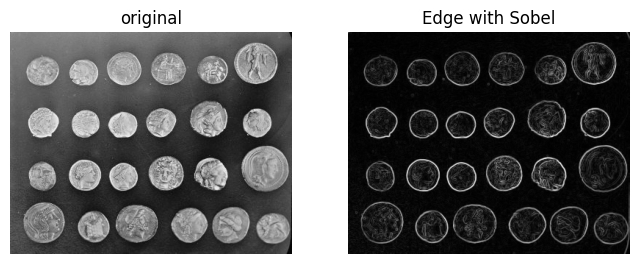

In [34]:
#import module and function
from skimage.filters import sobel

#Apply edge detection filter
edge_sobel = sobel(coins_image)

#Show original and resulting image to compare
plot_comparison(coins_image, edge_sobel, "Edge with Sobel")

### Gaussian smoothing
This is used to find the boundaries of objects within images

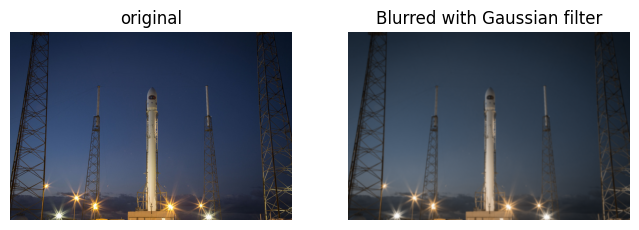

In [37]:
#import module and function
from skimage.filters import gaussian

#Apply edge detection filter
gaussian_image = gaussian(rocket)
#for older version use this:
#gaussian_image = gaussian(rocket, multichannel=True)

#Show original and resulting image to compare
plot_comparison(rocket, gaussian_image, "Blurred with Gaussian filter")

## Contrast Enhancement

Can be used to see clearly the x rays for example

Essentially, to spread further/wider the pixel values within an image

Low contrast image (eg an xray image, tends to skewed to one way, either the right or left or in the middle)


There are 3 types of Contrast Enhancement:
1) Histogram equalization, 2) Adaptive histogram equalization, 3) Contrast Limit Adaptive Histogram Equalization (CLAHE)

### Histogram Equalization
Spreads out the most frequent intensity values

In [ ]:
from skimage import exposure

#Obtain the equalized image
image_eq = exposure.equalize_hist(image)

#Show original and result
show_image(image, 'Original')
show_image(image_eq, 'Histogram equalized')


### Adaptive Equalization

computes several histograms, each corresponding to a distinct part of the image, and uses them to redistribute the lightness values of the image histogram. (operates on a small regions called tiles or neighborhoods)

### CLAHE in scikit-image

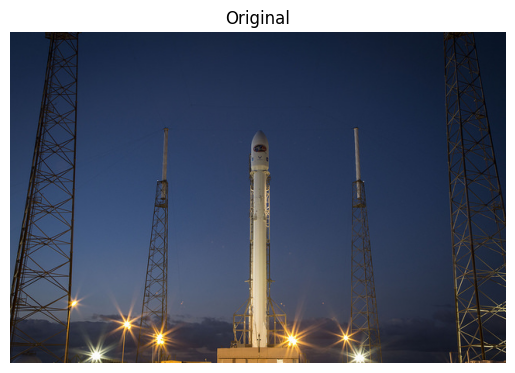

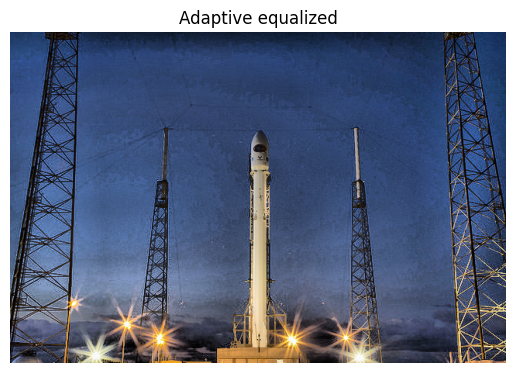

In [48]:
from skimage import exposure

# Apply adaptive Equalization. clip_limit ranges(0,1) where higher number means higher contrast
image_adapteq= exposure.equalize_adapthist(rocket, clip_limit=0.03)

# Show original and result
show_image(rocket, 'Original')
show_image(image_adapteq,'Adaptive equalized')

### Calculating Contrast of an Image

Formula is max pixel intensity - min pixel intensity

In [47]:
Contrast = np.max(rocket) - np.min(rocket)
Contrast

255

# Transformation

## Rotating Clockwise

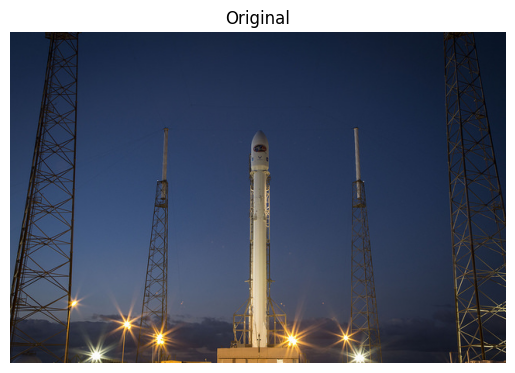

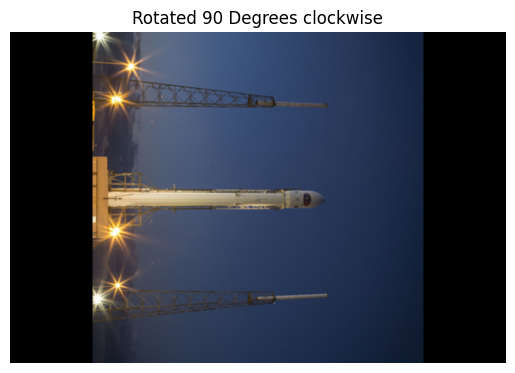

In [49]:
from skimage.transform import rotate

# Rotate the image 90 degrees clockwise
image_rotated = rotate(rocket, -90)

show_image(rocket,'Original')
show_image(image_rotated,'Rotated 90 Degrees clockwise')

## Rescaling

### Downgrading

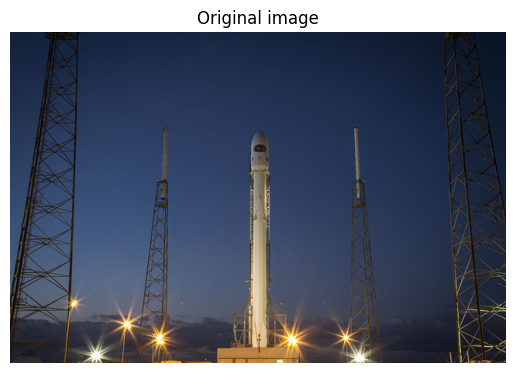

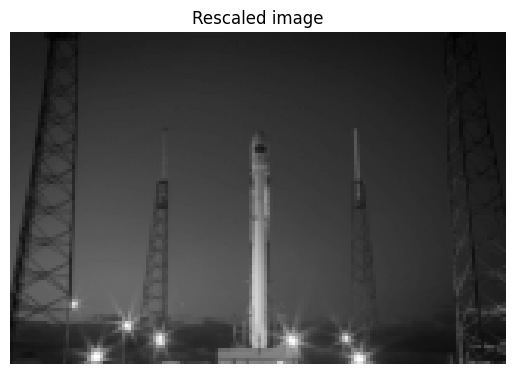

In [56]:
from skimage.transform import rescale

#Rescale the image to be 4 times smaller
image_rescaled = rescale(rocket, 1/4, anti_aliasing=True)

show_image(rocket, 'Original image')
show_image(image_rescaled, 'Rescaled image')

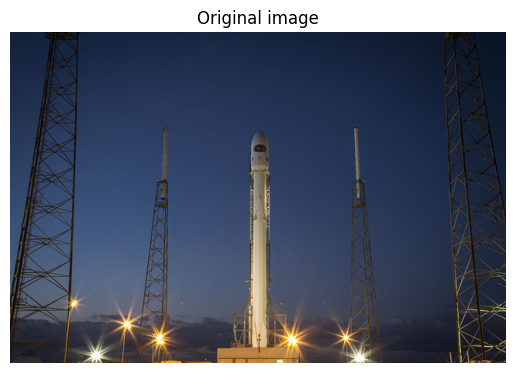

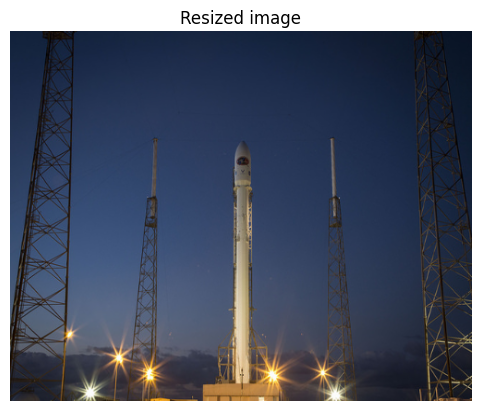

In [59]:
#Resizing
from skimage.transform import resize

#Height and width to resize
height = 400
width = 500

#Resize image
image_resized = resize(rocket, (height, width), anti_aliasing=True)

#Show the original and resulting images
show_image(rocket, 'Original image')
show_image(image_resized, 'Resized image')

## Resizing Proportionally

106.75
160.0


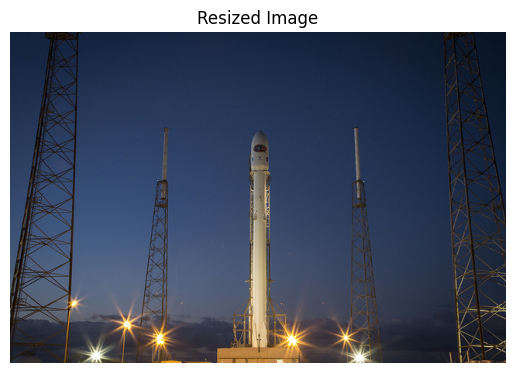

(427, 640, 3)


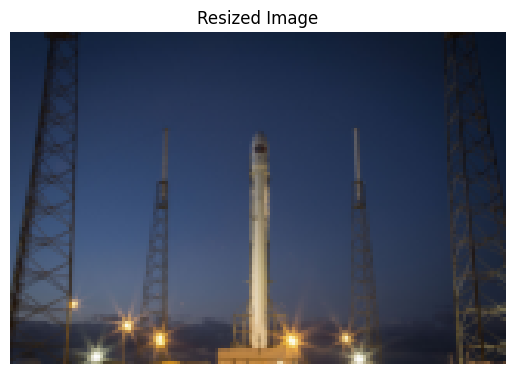

(107, 160, 3)


In [63]:
from skimage.transform import resize

#Set Proportional height so its 4 times its size
height = rocket.shape[0]/4
width = rocket.shape[1]/4

print(height)
print(width)


#Resize image
image_resized = resize(rocket, (height,width), anti_aliasing=True)
show_image(rocket,'Resized Image')
print(rocket.shape)
show_image(image_resized,'Resized Image')
print(image_resized.shape)


## Morphology
spot objecys by it's shape

2 Operations: 1 Dilation and Erosion

In [ ]:
from skimage import morphology
square = morphology.square(4)
rectangle = morphology.rectangle(4,2)


In [65]:
#Erosion in scikit-image (removing minor white noise and make the image more crisp)
from skimage import morphology

#Set structuring element to the rectangular-shaped
selem = rectangle(12,6)

#Obtain the erosed image with binary erosion
eroded_image = morphology.binary_erosion(image_horse, selem=selem)

#We can also use binary erosion with default selem
eroded_image = morphology.binary_erosion(image_horse)


NameError: name 'rectangle' is not defined

In [ ]:
#Dilation in scikit-image (remove the noise)
from skimage import morphology

#obtain dileted image, using binary dilation
dilated_image = morphology.binary_dilation(image_horse)

#see results
plot_comparison(image_horse, dilated_image, 'Erosion')

# Restore an image

Inpainting:

    Reconstructing lost parts of images

    Looking at the non damaged regions

In [ ]:
from skimage.restoration import inpaint

#obtain the mask
mask = get_mask(defect_image)

#apply inpainting to the damaged image using mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

show_image(defect_image,'Defect Image')
show_image(restored_image,'Restored Image')

# Masks


Intentionally set the missing parts of the image as black color. To automatically detect it, you would need to use Thresholding or segmentation to do so.

In [ ]:
#This is doing it manually. we set the mask[]
def get_mask(image):
    """ Creates mask with three defect regions """
    
    #initialized the mask
    mask = np.zeros(image.shape[:-1])
    
    mask[101:106, 0:240] = 1
    
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    
    mask[212:217, 0:150] = 1
    mask[271:222, 150:256] = 1
    
    return mask


### Adding noise into photo

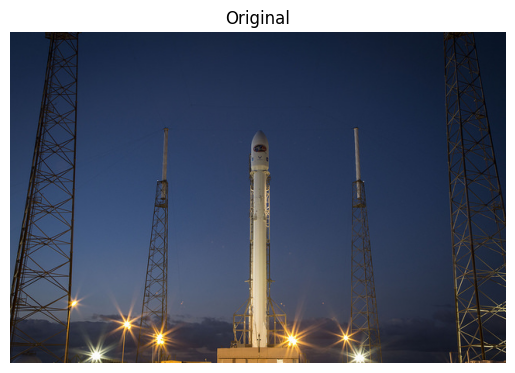

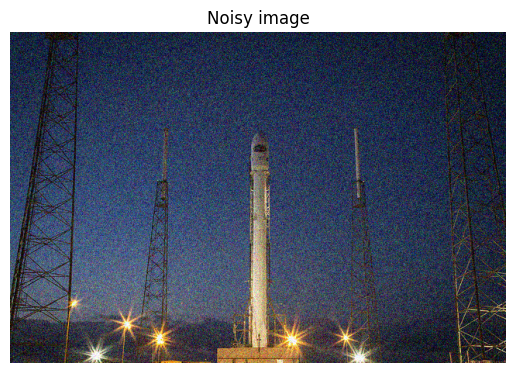

In [67]:
from skimage.util import random_noise

#add noise to the image
noisy_image = random_noise(rocket)

#Show original and resulting image
show_image(rocket, 'Original')
show_image(noisy_image, 'Noisy image')


### to reduce noise
Denoising types:
    
    Total variation (TV) (to minimize the total variation of the image)
    Bilateral (replacing the intensity of each pixel with weighted average of intensity values from nearby pixels)
    Wavelet Denoising
    Non-local means denoising
    

### Total variation filter to denoise

In [ ]:
from skimage.restoration import denoise_tv_chambolle

#Apply total variation filter denoising

denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)

#Show denoised image
show_image(noisy_image,'Noisy Image')
show_image(denoised_image,'Denoised Image')

### Bilateral filter

In [ ]:
from skimage.restoration import denoise_bilateral

#Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

#Show original and resulting images
show_image(noisy_image,'Noisy image')
show_image(denoised_image,'Denoised image')

## Superpixels & segmentation

Superpixels: a group of pixels formed to gether into sections. A single pixel alone wont be able to tell you what the image is. More meaningful regions.

Segmentation: 1)Supervised and 2)Unsupervised

### Unsupervised segmentation
Simple linear Iterative Clustering (SLIC). It segments the image using a machine learning algorithm called K-means clustering.

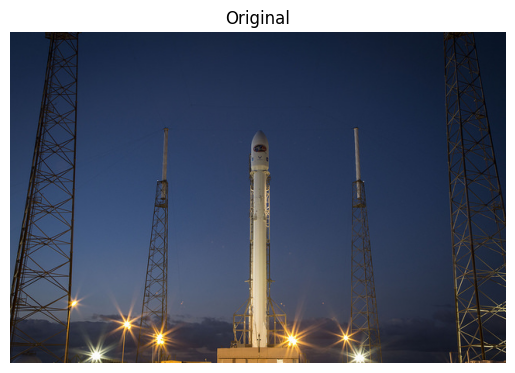

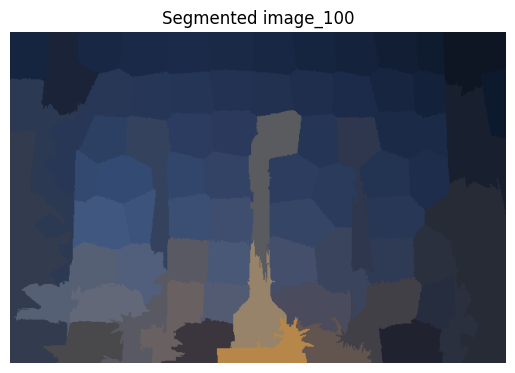

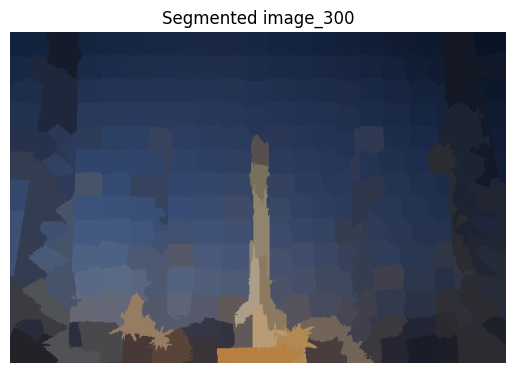

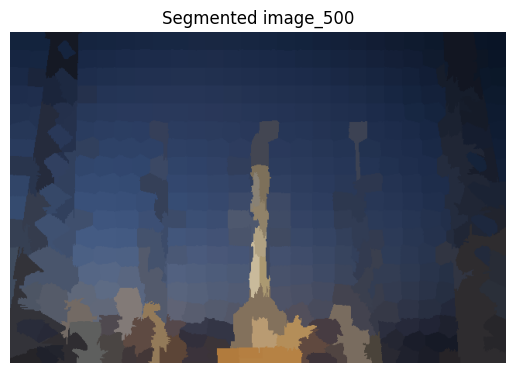

In [77]:
#Import the modules
from skimage.segmentation import slic
from skimage.color import label2rgb

#Obtain the segments, we can specify number of segments if we want
segments_100 = slic(rocket, n_segments=100)
segments_300 = slic(rocket, n_segments=300)
segments_500 = slic(rocket, n_segments=500)

#Put segments on top of original image to compare
segmented_image_100 = label2rgb(segments_100, rocket, kind='avg')
segmented_image_300 = label2rgb(segments_300, rocket, kind='avg')
segmented_image_500 = label2rgb(segments_500, rocket, kind='avg')

#Show original and resulting images
show_image(rocket,'Original')
show_image(segmented_image_100,'Segmented image_100')
show_image(segmented_image_300,'Segmented image_300')
show_image(segmented_image_500,'Segmented image_500')

### Number of Pixels

In [ ]:
#Formula for Number of Pixels are:

# of pixels = height*width

image.shape[0]*image.shape[1]

## Finding Contours
Steps needed to finding contours
    1. Preparing the image: Transform the image to 2D grayscale
    2. Apply thresholding
    3. 

In [ ]:
#Make the image grayscale
rocket_image = color.rgb2gray(rocket)

#obtain the thresh value
thresh = threshold_otsu(rocket_image)

#Apply thresholding
thresholded_image = image > thresh

#import measure module
from skimage import measure
#Find contours at a constant value of 0.8 (closer to 1 the more sensitive it is to detect contours)
contours = measure.find_contours(thresholded_image, 0.8)


for contour in contours:
    print(contour.shape)


# Create list with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

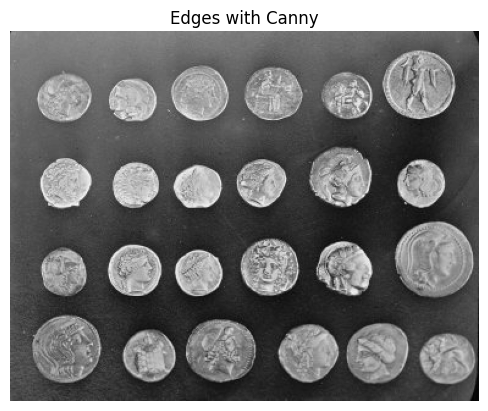

In [82]:
show_image(coins_image, "Edges with Canny")

### Finding Edges using Canny

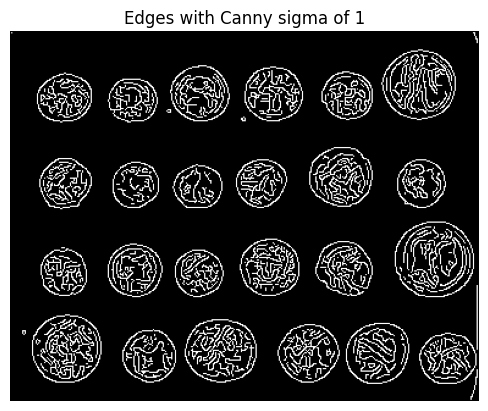

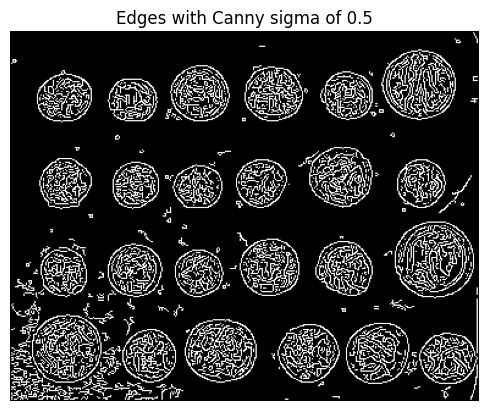

In [87]:
from skimage.feature import canny

# convert image to grayscale
#coins = color.rgb2gray(coins_image)

# Apply Canny Detector
canny_edges = canny(coins_image, sigma=1)
canny_edges_sigma = canny(coins_image, sigma=0.5)

# Show resulted image with edges
show_image(canny_edges, "Edges with Canny sigma of 1")
show_image(canny_edges_sigma, "Edges with Canny sigma of 0.5")


## Matching Corners

to match corners to detect if an image is tilted or slanted or not

### Harris Corner Detector

In [88]:
from skimage.feature import corner_harris

# Convert image into grayscale
image = rgb2gray(image)

# Apply the Harris corner detector on the image
measure_image = corner_harris(image)

#Show the Harris response image
show_image(measure_image)

#Finds the coordinates of the corners
coords = corner_peaks(corner_harris(image), min_distance=5)


def show_image_with_detected_corners(image, coords, title='Corners Detected'):
    plt.imshow(image, interpolation='nearst', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:,0], '+r', , markersize=15)
    plt.axis('off')
    plt.show()


#Show image with marks in detected corners
show_image_with_detected_corners(image, coords)




NameError: name 'rgb2gray' is not defined

In [ ]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

In [ ]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

## Facial Detection

In [ ]:
#Import the classifier class
from skimage.feature import Cascade

#Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

#Initialize the detector cascade.
detector = Cascade(trained_file)

#Apply detector on the image
detected = detector.detect_multi_scale(img=image, scale_factor=1.2, step_ratio=1, min_size=(10,10), max_size(200,200))
print(detected)

def show_detected_face(result, detected, title='Face image')
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False, color='r', linewidth=2)
        )
    plt.show()
    



#show image with detected face marked
show_detected_face(image, detected)



In [ ]:
# Obtain the segmentation with default 100 regions
segments = segments_100 = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

## Privacy Protection

In [ ]:
# Import Cascade of classifiers and gaussian filter
from skimage.feature import Cascade
from skimage.filters import gaussian

#Detect the faces
detected = detector.detect_multi_scale(image, scale_factor=1.2, step_ratio=1, min_size=(50,50), max_size=(100,100))

def getFace(d):
    """Extracts the face rectangle from the image using the coordinates of the detected."""
    
    #X and Y starting points of the face rectangle
    x,y = d['r'], d['c']
    
    #The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'], d['height']
    
    #Extract the detected face
    face = image[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
    #X and Y starting points of the face rectangle
    x,y = d['r'], d['c']
    
    #the width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    
    original[x:width, y:height] = gaussian_image
    return original


#For each detected face
for d in detected:
    #Obtain the face cropped from detected coordinates
    face = getFace(d)
    
    #Apply gaussian filter to extracted face
    gaussian_face = gaussian(face, multichannel=True, sigma=10)
    
    #Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(image, gaussian_face)
    



In [ ]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)